**Created by Sanskar Hasija**

**📊 NBME Detailed - EDA 📊**

**2 February 2021**


  # <center> 📊 NBME DETAILED- EDA 📊 </center>
## <center>If you find this notebook useful, support with an upvote👍</center>

# Table of Contents

<a id="toc"></a>
- [1. Introduction](#1)
- [2. Imports](#2)
- [3. EDA](#3)
    - [3.1 Train Data](#3.1)
    - [3.2 Test Data](#3.2)
    - [3.3 Patient Notes Data](#3.3)
        - [3.3.1 Patient Notes Distribution ( Per case ) ](#3.3.1)
        - [3.3.2 Patient Notes Length Distribution ](#3.3.2)
    - [3.4 Features Data](#3.4)
        - [3.4.1 Feature Distribution (per Case)  ](#3.4.1)
        - [3.4.2 Feature  Length Distribution ](#3.4.2)
    - [3.5 Patient analysis ](#3.5)
    - [3.6 Annotation analysis ](#3.6)
        - [3.6.1 Annotation Count Distribution  ](#3.6.1)
        - [3.6.2 Annotation Length Distribution   ](#3.6.2)
- [4. Annotation Visualiation with Spacy](#4)
- [5. WORD Clouds](#5)
    - [5.1 WORDCLOUD for Patient history](#5.1)
    - [5.1 WORDCLOUD for Features](#5.2)
    - [5.1 WORDCLOUD for Annotations](#5.3)

  

<a id="1"></a>
# Introduction

### <center>[NBME - Score Clinical Patient Notes](https://www.kaggle.com/c/nbme-score-clinical-patient-notes/overview)</center>

![](https://raw.githubusercontent.com/sanskar-hasija/kaggle/main/images/header.png)

<b>The text data presented here is from the USMLE® Step 2 Clinical Skills examination, a medical licensure exam. This exam measures a trainee's ability to recognize pertinent clinical facts during encounters with standardized patients.</b>

<b>During this exam, each test taker sees a Standardized Patient, a person trained to portray a clinical case. After interacting with the patient, the test taker documents the relevant facts of the encounter in a patient note. Each patient note is scored by a trained physician who looks for the presence of certain key concepts or features relevant to the case as described in a rubric. The goal of this competition is to develop an automated way of identifying the relevant features within each patient note, with a special focus on the patient history portions of the notes where the information from the interview with the standardized patient is documented.</b>

<a href="#toc" role="button" aria-pressed="true" >⬆️Back to Table of Contents ⬆️</a>

# <center>IMPORTS</center> 
<a id="2"></a>

In [1]:
import os
import spacy
import warnings
import wordcloud
import numpy as np
import pandas as pd
import seaborn as sns
import plotly.express as px
import matplotlib.pyplot as plt
import plotly.graph_objects as go

In [2]:
train = pd.read_csv("../input/nbme-score-clinical-patient-notes/train.csv")
test = pd.read_csv("../input/nbme-score-clinical-patient-notes/test.csv")
features = pd.read_csv("../input/nbme-score-clinical-patient-notes/features.csv")
patient_notes = pd.read_csv("../input/nbme-score-clinical-patient-notes/patient_notes.csv")
submission = pd.read_csv("../input/nbme-score-clinical-patient-notes/sample_submission.csv")

RANDOM_IDX = 12
warnings.filterwarnings('ignore')

<a href="#toc" role="button" aria-pressed="true" >⬆️Back to Table of Contents ⬆️</a>

# <center>EDA</center> 
<a id="3"></a>

<div class="alert alert-block alert-info" style="font-size:14px; font-family:verdana; line-height: 1.7em;">
    📌 &nbsp;<b><u>Observations in Train Data:</u></b>
 
* <i> There are total of ```6``` columns and `146300` rows in ```train``` data.</i>
* <i> Train data contain ```85800``` observation with ```0```  missing values.</i>
* <i> `10` unique cases and `1000` unique patient ids are present.</i>
* <i> Multilple annotations and locations are present in single rows.( More Discussed in below sections ) </i>

<a id="3.1"></a>
## Train data

**Column Description :**
* `id` - Unique identifier for each patient note / feature pair.
* `pn_num` - The patient note annotated in this row.
* `feature_num` - The feature annotated in this row.
* `case_num` - The case to which this patient note belongs.
* `annotation` - The text(s) within a patient note indicating a feature. A feature may be indicated multiple times within a single note.
* `location` - Character spans indicating the location of each annotation within the note. Multiple spans may be needed to represent an annotation, in which case the spans are delimited by a semicolon ;.

### Quick view of Train Data

In [3]:
print(f'\033[92mNumber of rows in train data: {train.shape[0]}')
print(f'\033[94mNumber of columns in train data: {train.shape[1]}')
print(f'\033[91mNumber of values in train data: {train.count().sum()}')
print(f'\033[91mNumber missing values in train data: {sum(train.isna().sum())}')
train.head()

Number of rows in train data: 14300
Number of columns in train data: 6
Number of values in train data: 85800
Number missing values in train data: 0


,id,case_num,pn_num,feature_num,annotation,location
0,00016_000,0,16,0,['dad with recent heart attcak'],['696 724']
1,00016_001,0,16,1,"['mom with ""thyroid disease']",['668 693']
2,00016_002,0,16,2,['chest pressure'],['203 217']
3,00016_003,0,16,3,"['intermittent episodes', 'episode']","['70 91', '176 183']"
4,00016_004,0,16,4,['felt as if he were going to pass out'],['222 258']


<a href="#toc" role="button" aria-pressed="true" >⬆️Back to Table of Contents ⬆️</a>

## Test data
<a id="3.2"></a>

### Quick view of Test Data

In [4]:
print(f'\033[92mNumber of rows in test data: {test.shape[0]}')
print(f'\033[94mNumber of columns in test data: {test.shape[1]}')
print(f'\033[91mNumber of values in train data: {test.count().sum()}')
print(f'\033[91mNo of rows with missing values  in test data: {sum(test.isna().sum())}')
test.head()

Number of rows in test data: 5
Number of columns in test data: 4
Number of values in train data: 20
No of rows with missing values  in test data: 0


,id,case_num,pn_num,feature_num
0,00016_000,0,16,0
1,00016_001,0,16,1
2,00016_002,0,16,2
3,00016_003,0,16,3
4,00016_004,0,16,4


<a href="#toc" role="button" aria-pressed="true" >⬆️Back to Table of Contents ⬆️</a>

<div class="alert alert-block alert-info" style="font-size:14px; font-family:verdana; line-height: 1.7em;">
    📌 &nbsp;<b><u>Observations in Patient Notes Data:</u></b>
 
* <i> There are total of ```3``` columns and `42146` rows in ```Patient Notes``` data.</i>
* <i> Patient Notes Data contain ```126438``` observation with ```0```  missing values.</i>
* <i> Number of patients per case are unequally distributed with `Case 3` having maximum and `Case 1` having minimum.</i>
* <i> Average length of `ph_history column` is `818.17`. </i>

## Patient Notes Data
<a id="3.3"></a>

**Column Description :**
* `pn_num` - A unique identifier for each patient note.
* `case_num` - A unique identifier for the clinical case a patient note represents.
* `pn_history` - The text of the encounter as recorded by the test taker.

### Quick view of Patient Notes Data

In [5]:
print(f'\033[92mNumber of rows in test data: {patient_notes.shape[0]}')
print(f'\033[94mNumber of columns in test data: {patient_notes.shape[1]}')
print(f'\033[91mNumber of values in train data: {patient_notes.count().sum()}')
patient_notes.head()

Number of rows in test data: 42146
Number of columns in test data: 3
Number of values in train data: 126438


,pn_num,case_num,pn_history
0,0,0,"17-year-old male, has come to the student heal..."
1,1,0,17 yo male with recurrent palpitations for the...
2,2,0,Dillon Cleveland is a 17 y.o. male patient wit...
3,3,0,a 17 yo m c/o palpitation started 3 mos ago; \...
4,4,0,17yo male with no pmh here for evaluation of p...


### Sample Patient Note 

In [6]:
print(patient_notes["pn_history"].iloc[RANDOM_IDX])

Patient is a 17 yo male presenting to student health clinic with permission of parent complaining of episodic heart pounding. States that they started 2-3 months ago, come on suddenly, and there have been 5-6 episodes in total lasting 3-4 minutes each with no increase in the frequency. However he does state that the most recent episode 2 days ago was the worst yet. Feels well between episodes. Episodes of heart pounding, shortness of breath, chest pressure, and lightheadedness. Episodes apparently precipicated by taking Adderal occasionally from his roomate, who has it as a precription, before tests to help with studying.
ROS: no nausea, no changes in bowel or bladder habits, no tingling, no numbness, no changes in vision, no fevers.
PMH: none
Allergies: nkda
Medications: taker Adderal prescribed to roomate
SH: college freshman, acknowledges stress of adjusting to college life, no smoking, social alcohol use, cannabis 1x


### Patient Notes Distribution ( Per case ) 
<a id="3.3.1"></a>

In [7]:
notes_counts = patient_notes.groupby("case_num").count()
fig = px.bar(data_frame =notes_counts, 
             x = notes_counts.index,
             y = 'pn_num' , 
             color = "pn_num",
             color_continuous_scale="Emrld") 
fig.update_layout(title = {
        'text': 'Distribution of patient notes for each case',
        'y':0.95,
        'x':0.48,
        'xanchor': 'center',
        'yanchor': 'top'} ,
                   xaxis = dict(
        tickmode = 'array',
        tickvals = [0, 1,2, 3, 4,5, 6,7,8,9],
        ticktext = ['Case 0', 'Case 1', 'Case 2', 'Case 3', 'Case 4', 'Case 5', 'Case 6', 'Case 7', 'Case 8', 'Case 9']),
                  template = "plotly_white")
fig.show()

### Patient Notes Length Distribution 
<a id="3.3.2"></a>

In [8]:
all_notes = []
all_notes_len = []
for notes in patient_notes['pn_history']:
    all_notes.append(notes)
    all_notes_len.append(len(notes))
print("Average length of Patient History - ",np.mean(all_notes_len))
fig = px.histogram(x = all_notes_len,  marginal="violin",nbins = 500)
fig.update_layout(template="plotly_white")
fig.update_xaxes(title = "Lenght of patient Notes")
fig.show()

Average length of Patient History -  818.1768139325203


<a href="#toc" role="button" aria-pressed="true" >⬆️Back to Table of Contents ⬆️</a>

<div class="alert alert-block alert-info" style="font-size:14px; font-family:verdana; line-height: 1.7em;">
    📌 &nbsp;<b><u>Observations in Features Data:</u></b>
 
* <i> There are total of ```3``` columns and `143` rows in ```Features``` data.</i>
* <i> Patient Notes Data contain ```429``` observation with ```0```  missing values.</i>
* <i> Number of patients per case are unequally distributed with `Case 5` and `Case 8` having maximum and `Case 7` having minimum.</i>
* <i> Average length of `feature_text` column is `23.20`. </i>

## Features Data
<a id="3.4"></a>


**Column Description :**
* `feature_num` - A unique identifier for each feature.
* `case_num` - A unique identifier for each case.
* `feature_text` - A description of the feature.

### Quick view of features Data

In [9]:
print(f'\033[92mNumber of rows in test data: {features.shape[0]}')
print(f'\033[94mNumber of columns in test data: {features.shape[1]}')
print(f'\033[91mNumber of values in train data: {features.count().sum()}')
features.head()

Number of rows in test data: 143
Number of columns in test data: 3
Number of values in train data: 429


,feature_num,case_num,feature_text
0,0,0,Family-history-of-MI-OR-Family-history-of-myoc...
1,1,0,Family-history-of-thyroid-disorder
2,2,0,Chest-pressure
3,3,0,Intermittent-symptoms
4,4,0,Lightheaded


### Sample Feature text

In [10]:
features["feature_text"].iloc[0]

'Family-history-of-MI-OR-Family-history-of-myocardial-infarction'

## Feature Distribution (per Case) 
<a id="3.4.1"></a>

In [11]:
feature_counts = features.groupby("case_num").count()
fig = px.bar(data_frame =feature_counts, 
             x = feature_counts.index,
             y = 'feature_num' , 
             color = "feature_num",
             color_continuous_scale="Emrld") 
fig.update_layout(title = {
        'text': 'Distribution of Features for each case',
        'y':0.95,
        'x':0.48,
        'xanchor': 'center',
        'yanchor': 'top'} ,
                   xaxis = dict(
        tickmode = 'array',
        tickvals = [0, 1,2, 3, 4,5, 6,7,8,9],
        ticktext = ['Case 0', 'Case 1', 'Case 2', 'Case 3', 'Case 4', 'Case 5', 'Case 6', 'Case 7', 'Case 8', 'Case 9']),
                  template = "plotly_white")
fig.show()

## Feature Length Distribution 
<a id="3.4.2"></a>

In [12]:
all_feat = []
all_feat_len = []
for notes in features['feature_text']:
    all_feat.append(notes)
    all_feat_len.append(len(notes))
print("Average length of Patient History - ",np.mean(all_feat_len))
fig = px.histogram(x = all_feat_len,  marginal="violin",nbins = 200)
fig.update_layout(template="plotly_white")
fig.update_xaxes(title = "Lenght of Features")
fig.show()

Average length of Patient History -  23.20979020979021


<a href="#toc" role="button" aria-pressed="true" >⬆️Back to Table of Contents ⬆️</a>

<div class="alert alert-block alert-info" style="font-size:14px; font-family:verdana; line-height: 1.7em;">
    📌 &nbsp;<b><u>Observations in Patient analysis:</u></b>
 
* <i> There are total of `1000` unique patients</i>
* <i> For every unqiue `pat_num` there are several rows depecting several anotations in patient notes.</i>


## Patient analysis 
<a id="3.5"></a>

### Unique Patient Count

In [13]:
print("Unique Patient Count in train data : ",len(train["pn_num"].value_counts()))

Unique Patient Count in train data :  1000


### Dataframe for a particular patient

In [14]:
PATIENT_IDX = 74087
patient_df = train[train["pn_num"] == PATIENT_IDX]
patient_df

,id,case_num,pn_num,feature_num,annotation,location
10791,74087_700,7,74087,700,['female'],['27 33']
10792,74087_701,7,74087,701,[],[]
10793,74087_702,7,74087,702,"['only had 2 cycles in the past 5 months', 'he...","['130 168', '182 192', '218 240', '48 73']"
10794,74087_703,7,74087,703,['LMP was 2 months ago'],['97 117']
10795,74087_704,7,74087,704,['has not restarted contraception'],['641 672']
10796,74087_705,7,74087,705,[],[]
10797,74087_706,7,74087,706,['not been able to get pregnant'],['465 494']
10798,74087_707,7,74087,707,['35 yo'],['21 26']
10799,74087_708,7,74087,708,['6 months'],['87 95']


### Patient Notes and Annotations 

In [15]:
print(f"\033[94mPatient Notes - ")
print(f'\033[94m',patient_notes[patient_notes["pn_num"] == PATIENT_IDX]["pn_history"].iloc[0])
print("------------")
print(f'\033[92mAnnotaions:')
for i in range(len(patient_df)):
    print(f'\033[92m',patient_df["annotation"].iloc[i])

Patient Notes - 
 Angela Tompkins is a 35 yo female presenting w/ abnormal menstraul cycles for the past 6 months. LMP was 2 months ago and she has only had 2 cycles in the past 5 months. She has had heavy flow during recent cycles and will last about 7 days. They used to only last 3-4 days and had regular intervals. She has hardly had any pain w/ her cycles. She used to take oral contraceptives but stopped eleven years ago to try and get pregnant. She has been unsuccessful and not been able to get pregnant despite having sexual intercourse with her boyfriend and trying "for years". She denies trying to become pregnant now and in the recent past. She has not restarted contraception since trying to become pregnant. She had her first pap smear 6 months ago that did not have any abnormal findings. She has regular obgyn follow up. Her aunt has breast cancer and her grandmother had cervical cancer. Family has not done any genetic testing.
------------
Annotaions:
 ['female']
 []
 ['only had

<a href="#toc" role="button" aria-pressed="true" >⬆️Back to Table of Contents ⬆️</a>

<div class="alert alert-block alert-info" style="font-size:14px; font-family:verdana; line-height: 1.7em;">
    📌 &nbsp;<b><u>Observations in Annotation analysis:</u></b>
 
* <i> There are total of `12234` annotations present in train data</i>
* <i> A total of `4399` annotations are empty and their corresponding location is an `empty list`</i>
* <i> There is `1` row each in train data having `8 and 9 annotations` in a single row</i>
* <i> Average length of annotations is `16.52`. </i>


## Annotation Analysis 
<a id="3.6"></a>

### Empty Annotation count

In [16]:
print("Number of Empty annotions and locations = ", sum(train["location"] == '[]'))

Number of Empty annotions and locations =  4399


### Annotation Count Distribution
<a id="3.6.1"></a>

In [17]:
train["location"] = train["location"].apply(eval)
train['annotation'] = train['annotation'].apply(eval)
train["annot_count"] = 0
for i in range(len(train)):
    train["annot_count"][i] = len(train["annotation"][i])
total_annot = 0
for idx in train["annot_count"].value_counts().sort_index().index:
    total_annot += train["annot_count"].value_counts().sort_index()[idx] * idx
print(f'\033[92mTotal number of Annotations is train data  : ' , total_annot)
print(f'\033[94mAnnotation count per row: ')
print(f'\033[94m',train["annot_count"].value_counts().sort_index())

Total number of Annotations is train data  :  12234
Annotation count per row: 
 0    4399
1    8181
2    1296
3     287
4      99
5      27
6       9
7       1
8       1
Name: annot_count, dtype: int64


In [18]:
fig = px.bar(data_frame =train, 
             x = train["annot_count"].value_counts().sort_index().index,
             y = train["annot_count"].value_counts().sort_index() , 
             color = train["annot_count"].value_counts().sort_index(),
             color_continuous_scale="Emrld") 
fig.update_xaxes(title ="Number of Annotations")
fig.update_yaxes(title ="Number of Rows")
fig.update_layout(title = {
        'text': 'Number of Annotations per row',
        'y':0.95,
        'x':0.48,
        'xanchor': 'center',
        'yanchor': 'top'} ,
                   
                  template = "plotly_white")
fig.show()

### Annotation Length Distribution 
<a id="3.6.2"></a>

In [19]:
annot_lengths = []
all_annot_words = []
for annot in train["annotation"]:
    for words in annot:
        annot_lengths.append(len(words))
        all_annot_words.append(words)
print("Average length of Annotations - ",np.mean(annot_lengths))
fig = px.histogram(x = annot_lengths,  marginal="violin",nbins = 400)
fig.update_layout(template="plotly_white")
fig.update_xaxes(title = "Lenght of Annotation")
fig.show()

Average length of Annotations -  16.528445316331535


<a href="#toc" role="button" aria-pressed="true" >⬆️Back to Table of Contents ⬆️</a>

# <center>Annotation Visualisation (SPACY)</center> 
<a id="4"></a>

In [20]:
patient_df = train[train["pn_num"] == PATIENT_IDX]
location  = patient_df["location"]
annotation = patient_df["annotation"]
start_pos = []
end_pos = []
for i in location:
    for j in i:
        start_pos.append(j.split()[0])
        end_pos.append(j.split()[1])
        
ents = []
for i in range(len(start_pos)):
    ents.append({
        'start': int(start_pos[i]), 
        'end' : int(end_pos[i]),
        "label" : "Annotation"
    })
doc = {
    'text' : patient_notes[patient_notes["pn_num"] == PATIENT_IDX]["pn_history"].iloc[0],
    "ents" : ents
}
colors = {"Annotation" :"linear-gradient(90deg, #aa9cfc, #fc9ce7)" } 
options = {"colors": colors}
spacy.displacy.render(doc, style="ent", options = options , manual=True, jupyter=True);

<a href="#toc" role="button" aria-pressed="true" >⬆️Back to Table of Contents ⬆️</a>

# <center>WORD CLOUDS</center> 
<a id="5"></a>

## WORDCLOUD for Patient history
<a id="5.1"></a>

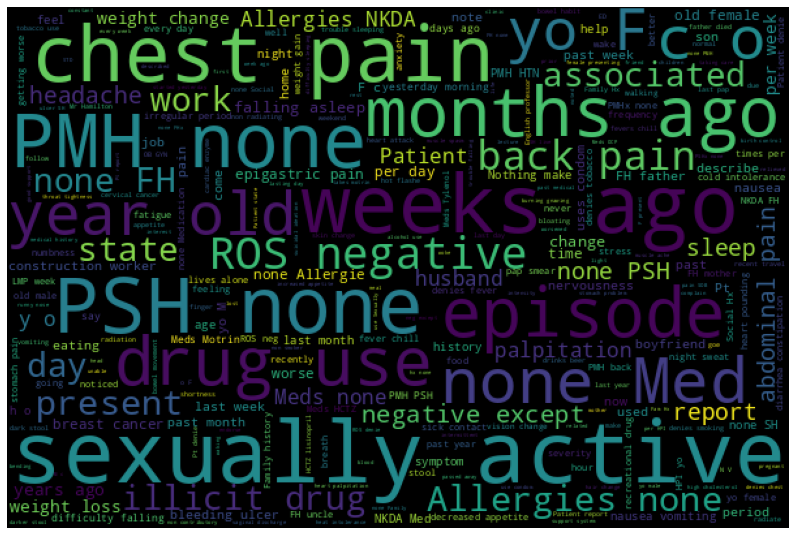

In [21]:
wordcloud_notes = wordcloud.WordCloud(stopwords=wordcloud.STOPWORDS, max_font_size=80, max_words=5000,
                      width = 600, height = 400,
                      background_color='black').generate(" ".join(all_notes))
fig, ax = plt.subplots(figsize=(14,10))
ax.imshow(wordcloud_notes, interpolation='bilinear')
ax.set_axis_off()
plt.imshow(wordcloud_notes);

## WORDCLOUD for Features
<a id="5.2"></a>

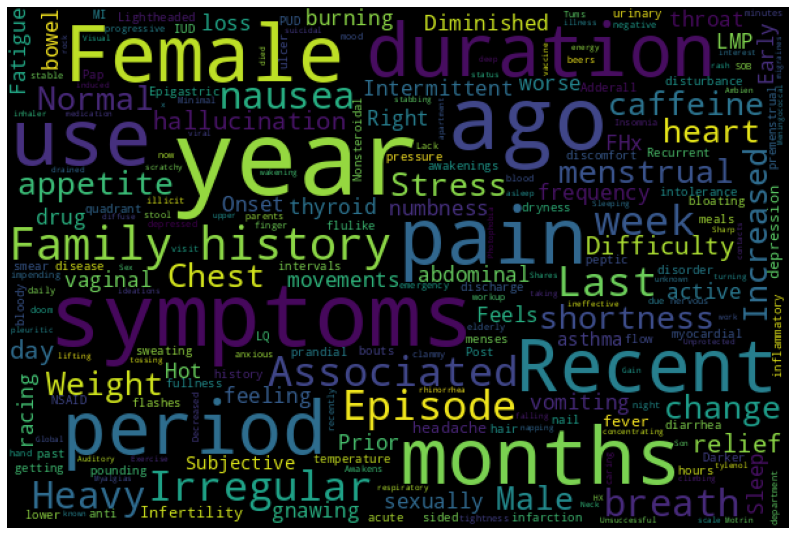

In [22]:
wordcloud_feat = wordcloud.WordCloud(stopwords=wordcloud.STOPWORDS, max_font_size=80, max_words=5000,
                      width = 600, height = 400,
                      background_color='black').generate(" ".join(all_feat))
fig, ax = plt.subplots(figsize=(14,10))
ax.imshow(wordcloud_feat, interpolation='bilinear')
ax.set_axis_off()
plt.imshow(wordcloud_feat);

## WORDCLOUD for Annotations
<a id="5.3"></a>

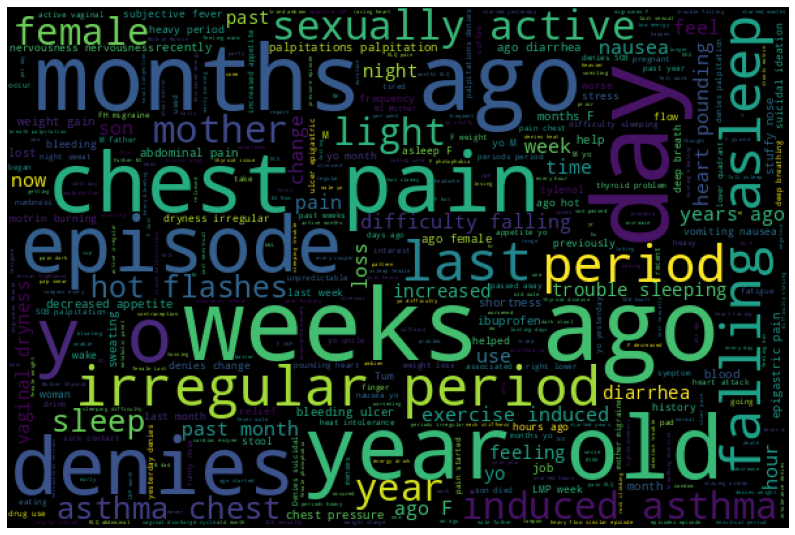

In [23]:
wordcloud_annot = wordcloud.WordCloud(stopwords=wordcloud.STOPWORDS, max_font_size=80, max_words=5000,
                      width = 600, height = 400,
                      background_color='black').generate(" ".join(all_annot_words))
fig, ax = plt.subplots(figsize=(14,10))
ax.imshow(wordcloud_annot, interpolation='bilinear')
ax.set_axis_off()
plt.imshow(wordcloud_annot);

<a href="#toc" role="button" aria-pressed="true" >⬆️Back to Table of Contents ⬆️</a>

### <center>Thank you for reading🙂</center>
### <center>If you have any feedback or find anything wrong, please let me know!</center>
